## NAIVE BAYES

## CREATING CUSTOM LABELS OUT OF THE EXISTING LABELS

In [ ]:
import pandas as pd
df = pd.read_csv('coal_dataset.csv')

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [ ]:
## Define thresholds for carbon intensity
def calculate_carbon_intensity(row):
    if row['sulfur-content'] > 2.0 and row['ash-content'] > 10.0 and row['quantity'] > 1000000:
        return 'High'
    elif row['sulfur-content'] > 1.0 and row['ash-content'] > 5.0 and row['quantity'] > 500000:
        return 'Medium'
    else:
        return 'Low'

# Creating the carbon intensity label
df['carbon_intensity'] = df.apply(calculate_carbon_intensity, axis=1)

In [ ]:
# Replace NaN values with the column mean
df['price'] = df['price'].fillna(df['price'].mean())

print(df.head())


   period      plantStateDescription  plant  \
0    2023  Pennsylvania (Bituminous)   3943   
1    2023                   Virginia  56808   
2    2023                    Wyoming   8066   
3    2023                       Ohio   6071   
4    2023                   Illinois   6071   

                               plantName rank coalRankDescription  \
0  FirstEnergy Fort Martin Power Station  BIT          Bituminous   
1     Virginia City Hybrid Energy Center  BIT          Bituminous   
2                            Jim Bridger  TOT                 All   
3                         Trimble County  TOT                 All   
4                         Trimble County  BIT          Bituminous   

   ash-content  heat-content  price  quantity  sulfur-content carbon_intensity  
0         8.66         12711  61.42   1939159            3.04           Medium  
1        32.35          8186  55.40    488938            0.81              Low  
2        10.61          9215  64.26   4698553            0.

In [ ]:
df

,period,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,carbon_intensity
0,2023,Pennsylvania (Bituminous),3943,FirstEnergy Fort Martin Power Station,BIT,Bituminous,8.66,12711,61.420000,1939159,3.04,Medium
1,2023,Virginia,56808,Virginia City Hybrid Energy Center,BIT,Bituminous,32.35,8186,55.400000,488938,0.81,Low
2,2023,Wyoming,8066,Jim Bridger,TOT,All,10.61,9215,64.260000,4698553,0.54,Low
3,2023,Ohio,6071,Trimble County,TOT,All,8.49,10985,49.040000,3330230,2.44,Medium
4,2023,Illinois,6071,Trimble County,BIT,Bituminous,9.24,11518,49.370000,2669367,2.96,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
20416,2008,Virginia,3797,Chesterfield,TOT,All,9.59,12675,68.260000,3055272,1.15,Medium
20417,2008,Kentucky (East),3935,John E Amos,BIT,Bituminous,12.01,12124,62.360000,5948900,0.81,Low
20418,2008,Kentucky (East),3936,Kanawha River,BIT,Bituminous,12.53,12191,65.870000,948100,0.79,Low
20419,2008,Texas,7030,Twin Oaks Power One,TOT,All,15.97,6785,58.592239,1984261,1.07,Medium


In [ ]:
# Select features and label
X = df[['ash-content', 'heat-content', 'price', 'quantity', 'sulfur-content']]
y = df['carbon_intensity']

In [ ]:
X

,ash-content,heat-content,price,quantity,sulfur-content
0,8.66,12711,61.420000,1939159,3.04
1,32.35,8186,55.400000,488938,0.81
2,10.61,9215,64.260000,4698553,0.54
3,8.49,10985,49.040000,3330230,2.44
4,9.24,11518,49.370000,2669367,2.96
...,...,...,...,...,...
20416,9.59,12675,68.260000,3055272,1.15
20417,12.01,12124,62.360000,5948900,0.81
20418,12.53,12191,65.870000,948100,0.79
20419,15.97,6785,58.592239,1984261,1.07


In [ ]:
y

,carbon_intensity
0,Medium
1,Low
2,Low
3,Medium
4,Medium
...,...
20416,Medium
20417,Low
20418,Low
20419,Medium


In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,ash-content,heat-content,price,quantity,sulfur-content
10175,8.13,12991,78.590000,246541,2.20
6670,7.27,12070,62.430000,1542284,2.85
7403,11.54,12332,79.720000,734666,1.90
17890,13.79,11829,58.592239,411810,2.49
8561,9.28,12552,93.830000,5313817,1.66
...,...,...,...,...,...
11284,5.79,8898,34.390000,4121272,0.38
11964,9.90,12580,58.592239,3172,1.59
5390,11.95,11478,44.960000,3311080,3.46
860,9.42,11325,65.140000,4448943,2.54


In [ ]:
X_train.shape, X_test.shape

((14294, 5), (6127, 5))

In [ ]:
X_test

,ash-content,heat-content,price,quantity,sulfur-content
17243,10.56,10938,58.592239,2185314,2.87
12656,7.80,12100,63.720000,49201,2.78
12692,8.40,12922,58.592239,493320,3.29
5348,4.89,8630,58.592239,3003305,0.28
15099,22.59,8487,28.380000,7890507,0.79
...,...,...,...,...,...
5118,4.84,8940,42.680000,2048109,0.24
2231,8.48,11906,59.190000,90059,2.56
10899,5.97,9811,48.600000,1635950,0.41
14169,11.01,12381,59.550000,3452942,2.06


In [ ]:
y_train

,carbon_intensity
10175,Low
6670,Medium
7403,Medium
17890,Low
8561,Medium
...,...
11284,Low
11964,Low
5390,High
860,Medium


In [ ]:
y_test

,carbon_intensity
17243,High
12656,Low
12692,Low
5348,Low
15099,Low
...,...
5118,Low
2231,Low
10899,Low
14169,High


In [ ]:



# Multinomial Naive Bayes
mnb = MultinomialNB()
X_train_mnb = X_train.copy()
X_train_mnb[X_train_mnb < 0] = 0
X_test_mnb = X_test.copy()
X_test_mnb[X_test_mnb < 0] = 0
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)
print("Multinomial NB Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("\nGaussian NB Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))

# Bernoulli Naive Bayes
bnb = BernoulliNB()
X_train_binarized = (X_train > 0).astype(int)
X_test_binarized = (X_test > 0).astype(int)
bnb.fit(X_train_binarized, y_train)
y_pred_bnb = bnb.predict(X_test_binarized)
print("\nBernoulli NB Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_bnb) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))

Multinomial NB Results:
Accuracy: 48.44132528154072
Confusion Matrix:
 [[ 248   93   49]
 [ 954 2477  248]
 [ 714 1101  243]]

Gaussian NB Results:
Accuracy: 69.41406887546924
Confusion Matrix:
 [[   0   67  323]
 [   0 2384 1295]
 [   0  189 1869]]

Bernoulli NB Results:
Accuracy: 60.04569936347315
Confusion Matrix:
 [[   0  390    0]
 [   0 3679    0]
 [   0 2058    0]]


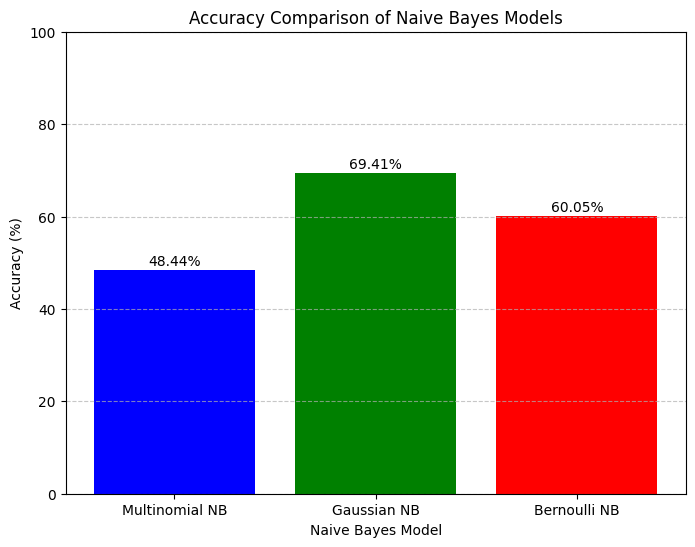

In [ ]:
import matplotlib.pyplot as plt

# Accuracy data
models = ['Multinomial NB', 'Gaussian NB', 'Bernoulli NB']
accuracies = [48.44, 69.41, 60.05]  # Accuracy percentages for each model

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Accuracy Comparison of Naive Bayes Models')
plt.xlabel('Naive Bayes Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc}%", ha='center', fontsize=10)

# Show the plot
plt.show()


## DECISION TREE

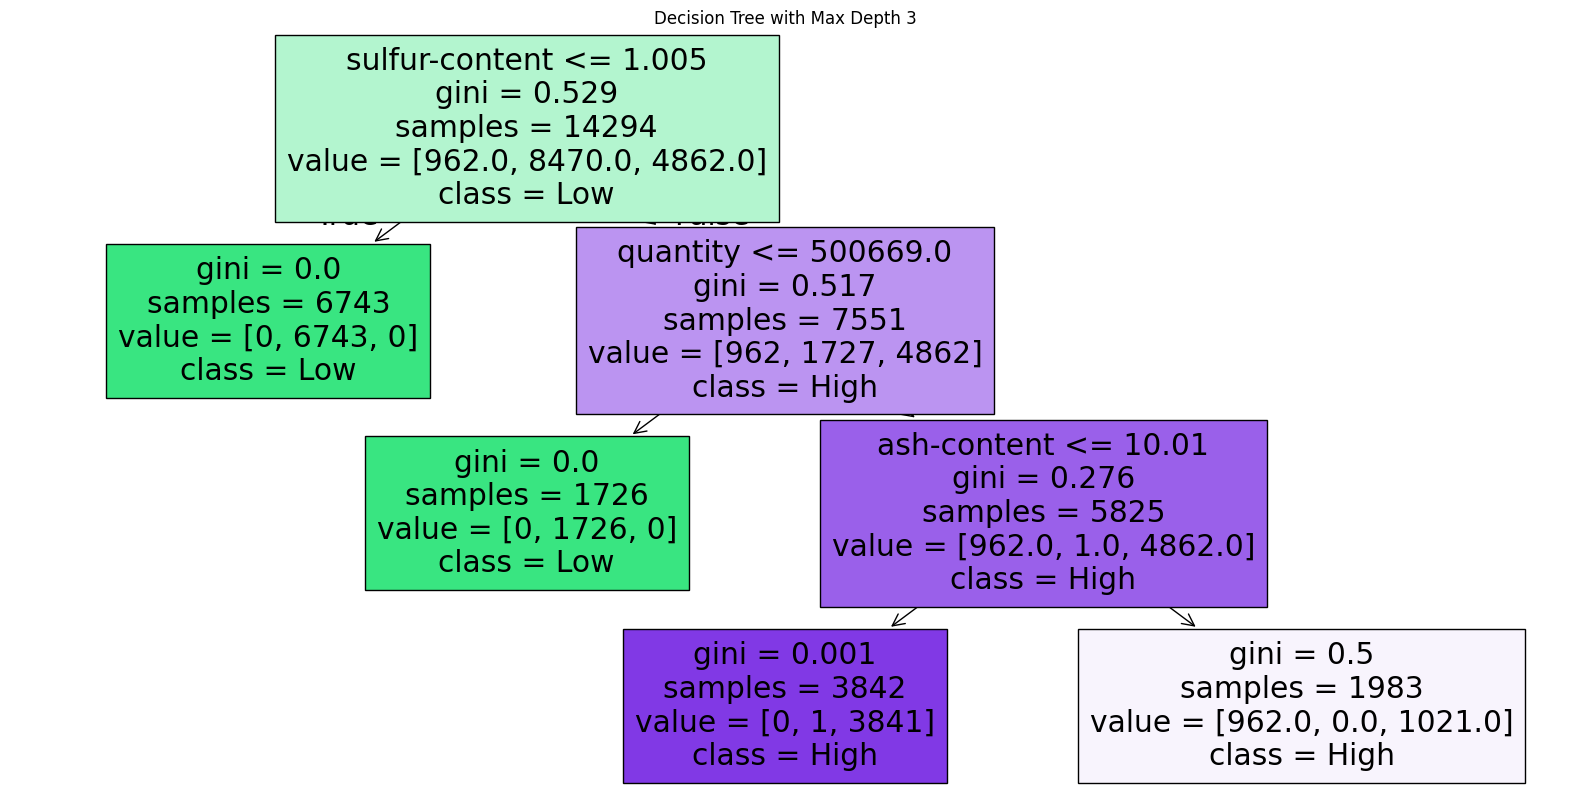


Decision Tree (Max Depth = 3) Results:
Accuracy: 93.61841031499918
Confusion Matrix:
 [[   0    0  390]
 [   0 3678    1]
 [   0    0 2058]]


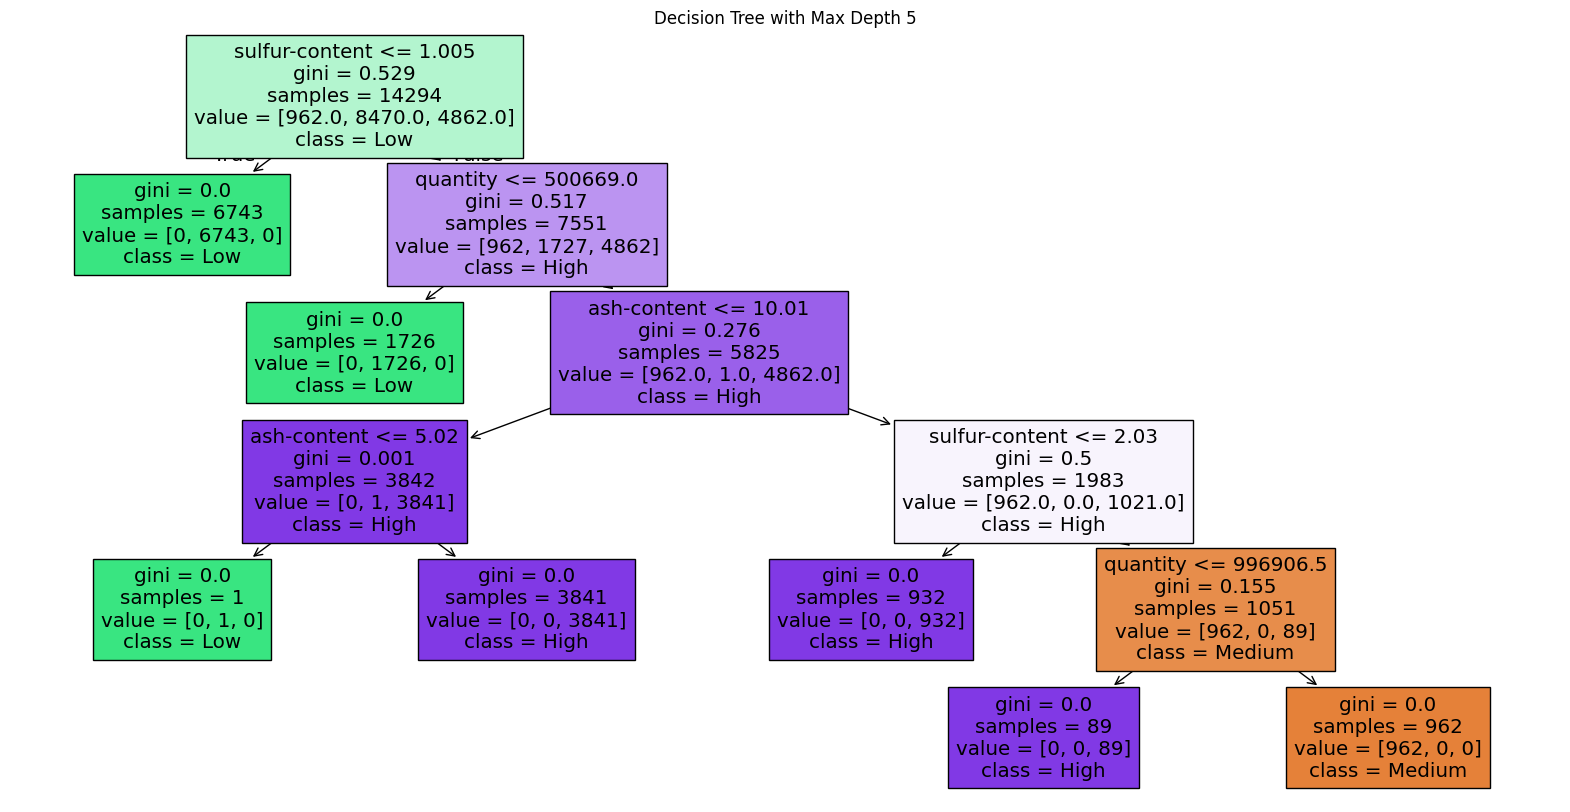


Decision Tree (Max Depth = 5) Results:
Accuracy: 100.0
Confusion Matrix:
 [[ 390    0    0]
 [   0 3679    0]
 [   0    0 2058]]


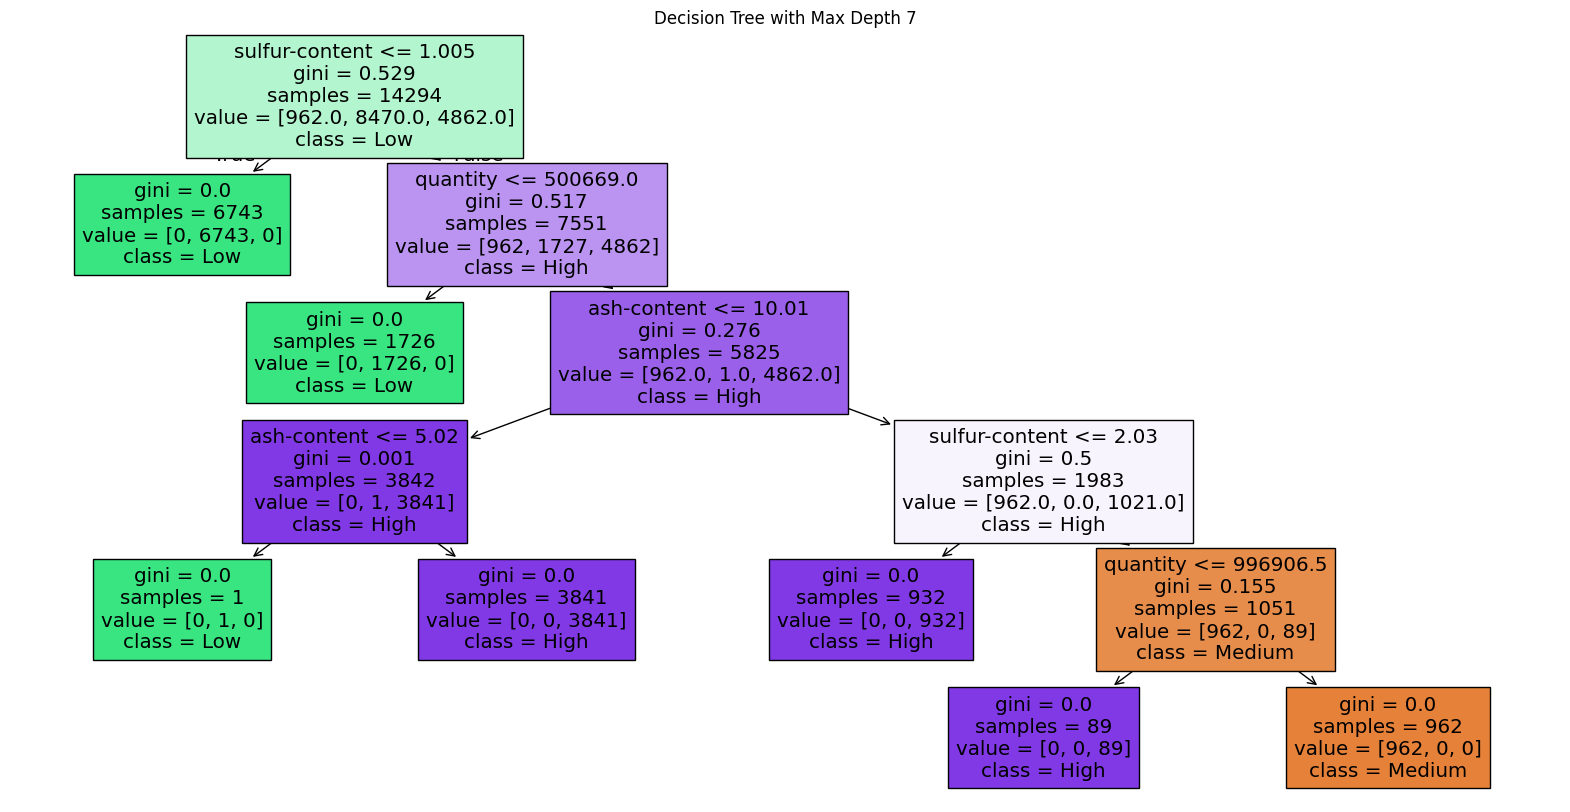


Decision Tree (Max Depth = 7) Results:
Accuracy: 100.0
Confusion Matrix:
 [[ 390    0    0]
 [   0 3679    0]
 [   0    0 2058]]


In [ ]:
# Data Prep
X = df[['ash-content', 'heat-content', 'price', 'quantity', 'sulfur-content']]
y = df['carbon_intensity']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree models with different max depths to generate different root nodes
depths = [3, 5, 7]
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    # Plot Decision Tree
    plt.figure(figsize=(20, 10))
    plot_tree(dt, feature_names=X.columns, class_names=y.unique(), filled=True)
    plt.title(f"Decision Tree with Max Depth {depth}")
    plt.show()

    # Accuracy and Confusion Matrix
    print(f"\nDecision Tree (Max Depth = {depth}) Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
